# Mini projet : Digue

## Travail à la maison

bilan des forces : 
- Fp(eau) = -p(eau).S.ex
- Fp(air) = p(air).S.ex
- f = µ.m.g.ex
- P = -m.g.ey
- N = N.ey
<br>la force de frottement f permet à la digue de pas glisser.

P(x)eau = ρ.g.(H-x)

  selon ex : 
- p(air).S +  µ.m.g = p(eau).S
<br>selon ey :
- m.g = N

### Modélisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

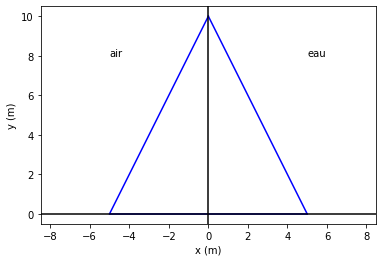

In [2]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xa = -5
xe = +5


# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

## Travail en séance

In [3]:
import scipy.integrate as si
def larg(y):
    return L*(feau(y)-fair(y))
L =1
larg_analytique = ((xe-xa)*H)/2

V,erreur = si.quad(larg,0,H)
print('analytiquement, le vomule de la digue est: ',V)
print('par intégration, le vomule de la digue est: ',larg_analytique)

g = 9.81
peau = 1000
res,err = si.quad(feau,0,H)
res1,err1 = si.quad(fair,0,H)

#calcul force de gravité
masse_volumique = 3000
poid = -abs(res-res1)*masse_volumique*g
print('la force de gravité est : ', poid, 'N')
print('l aire de l eau est : ',abs(res), 'm3')
print('l aire de l air est : ',abs(res1), 'm3')
print('l aire totale est : ',abs(res-res1), 'm3')

analytiquement, le vomule de la digue est:  50.0
par intégration, le vomule de la digue est:  50.0
la force de gravité est :  -1471500.0 N
l aire de l eau est :  25.0 m3
l aire de l air est :  25.0 m3
l aire totale est :  50.0 m3


In [4]:
def df_x(y):
    return -peau*g*(H-y)
f_x,err1=si.quad(df_x,0,H)

def df_y(y):
    return peau*g*(H-y)*xa/H
f_y,err1=si.quad(df_y,0,H)

print('la force en x est : ', f_x, 'N')
print('la force en y est : ', f_y, 'N')

#module de la force
module = np.sqrt(f_x**2+f_y**2)
print('la resultante des forces est : ', module, 'N')

la force en x est :  -490500.0 N
la force en y est :  -245250.0 N
la resultante des forces est :  548395.6714818234 N


In [5]:
N = -f_y -poid
T = -f_x
print(T/N)

0.2857142857142857


Le rapport T/N est inférieur au coefficient de frottement, la digue est donc stable. 
<br> S'il avait été superieur, la digue ne serait pas stable.

In [6]:
force_normal = -res+poid
print('la force de réaction du sol est : ', force_normal, 'N')
force_tang = force_normal*0.5
print('la force de réaction tangantiel est : ', force_tang, '(sur x) N')
rapport_tn = force_tang/force_normal
print(rapport_tn)

la force de réaction du sol est :  -1471525.0 N
la force de réaction tangantiel est :  -735762.5 (sur x) N
0.5
